# Actividad 4

### <i> Alejandro Tolosa

### Importar librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import os
import warnings

---

### 1.	Implementación y visualización de k-means en 2D (30 ptos)

Abrir entorno de programación, de preferencia utilizar Visual studio o Jupyter notebook. 

Cargar la base de datos kmeans1.csv utilizando pandas.

In [2]:
TABLA1 = pd.read_csv("kmeans.1.csv")

TABLA1

,A,B
0,-3.032505,-3.367918
1,-2.603797,-1.616394
2,-1.357223,-0.199628
3,-2.992206,-3.523316
4,-1.708192,-1.007209
...,...,...
395,11.387093,11.833448
396,10.228298,11.730811
397,11.256921,12.703525
398,11.142780,11.767086


In [3]:
TABLA1 = (TABLA1 - TABLA1.min())/(TABLA1.max() - TABLA1.min())
TABLA1.head

<bound method NDFrame.head of             A         B
0    0.067984  0.047531
1    0.089996  0.141370
2    0.154003  0.217274
3    0.070053  0.039205
4    0.135982  0.174007
..        ...       ...
395  0.808373  0.861954
396  0.748874  0.856455
397  0.801689  0.908569
398  0.795829  0.858399
399  0.884119  0.893811

[400 rows x 2 columns]>

Por medio de matplotlib (o seaborn) genere un gáfico de dispersión (scatter plot) de las variables A y B.

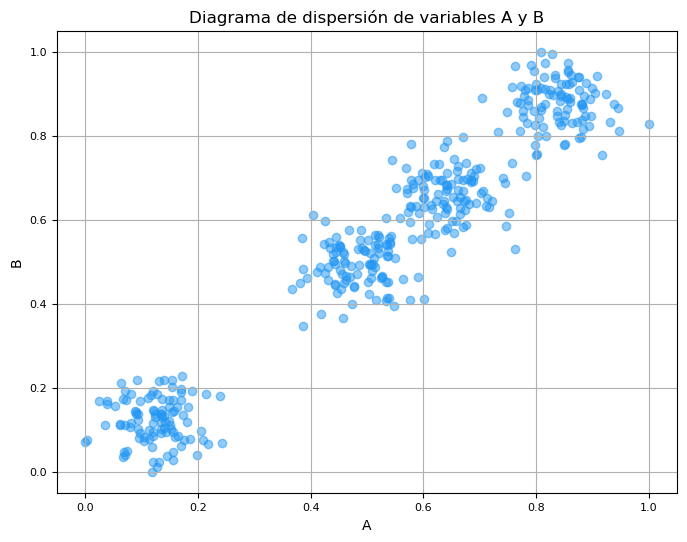

In [4]:
plt.figure(figsize=[8,6])
plt.scatter(TABLA1['A'], TABLA1['B'], c='#2196f3', alpha=0.5)
plt.title("Diagrama de dispersión de variables A y B")
plt.xlabel("A")
plt.ylabel("B")
plt.grid(True)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()


Aplique el algoritmo k-means (from sklearn.cluster import KMeans), observe y analice los outputs disponibles (centroides, clusters asignados y distancia dentro de las clases).

In [5]:
#ALGORITMO K-MEANS
KM_TABLA1 = KMeans(n_clusters=4, random_state=0)
TABLA1['cluster'] = KM_TABLA1.fit_predict(TABLA1)

c:\Users\aleja\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\aleja\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [6]:
#CENTROIDES
CENTROIDES_TABLA1 = KM_TABLA1.cluster_centers_
print(CENTROIDES_TABLA1)

[[0.48395258 0.49330798]
 [0.83902637 0.87789952]
 [0.12488096 0.1225848 ]
 [0.64504777 0.66137917]]


In [7]:
#CLUSTERS ASIGNADOS
TABLA1['cluster'].value_counts()

cluster
3    101
2    100
0    100
1     99
Name: count, dtype: int64

In [8]:
#DISTANCIA DENTRO DE LAS CLASES
KM_TABLA1.inertia_

2.176114977897748

<i> Como podemos mirar en el gráfico anterior, se observa que la dispersión se tiene a agrupar en cuatro clusters, el primero alrededor del centroide ubicado en el eje (0,12 0,12); el segundo grupo se concentra alrededor del centroide (0,48 0,49), el tercer grupo se encuentra cercano al centroide (0,64 0,66) y el de más arriba está centrado alrededor del eje (0,83 0,87). Las variables asignadas a los clusters varían entre 99 a 101 por lo que el tamaño de los clusters son muy similares. La distancia dentro de los clusters es de 2,176

Ajuste k-means considerando 1,2,...10 clusters, guarde la distancia intra clases en un diccionario. Estudie la documentación de la clase y modifique los argumentos init, n init y max it.


In [9]:
RESULTADOS = {}
for k in range(1, 11):
    KMEANS = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(TABLA1)
    RESULTADOS[k] = KMEANS.inertia_


c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Utilizando matplotlib (o seaborn) genere un gráfico que presente la distancia intra clases para cada k utilizado. A través del criterio del codo defina el námero de clusters óptimo.

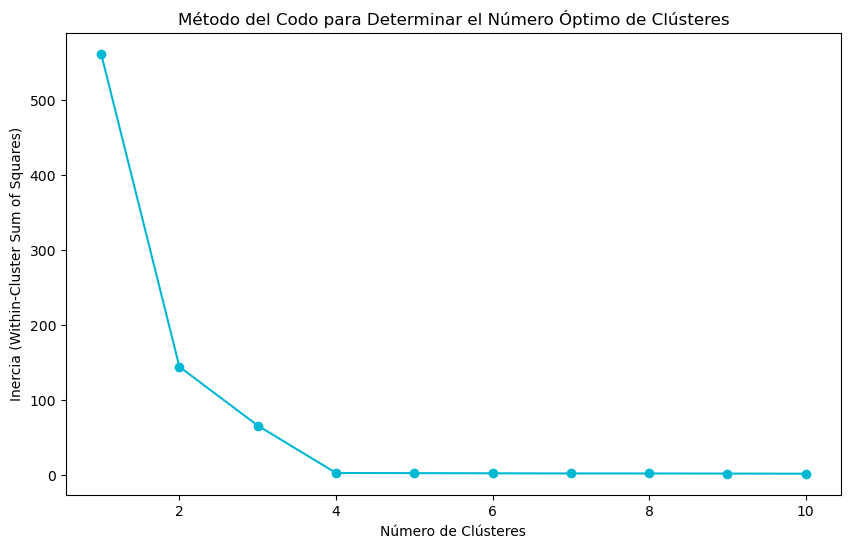

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(list(RESULTADOS.keys()), list(RESULTADOS.values()), color="#00b8d4", marker='o')
plt.title('Método del Codo para Determinar el Número Óptimo de Clústeres')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia (Within-Cluster Sum of Squares)')
plt.show()

<i> Como podemos observar el gráfico el número óptimo para determinar el número de clusters es 4, ya que a partir de esta cifra no disminuye la inercia, por lo demás de acuerdo al gráfico 1 evidencia que hay 4 clusters, y tambíen se condice con la cantidad de variables asignadas a cada cluster

### 2.	Análisis de clusters

Aplicar el algoritmo k-means a la base de datos k-means2.csv. Aplique el procesamiento necesario a los datos para una correcta asignación de clusters.

In [11]:
os.environ["LOKY_MAX_CPU_COUNT"] = "4"
warnings.filterwarnings("ignore", category=UserWarning, module='joblib')

TABLA2 = pd.read_csv("kmeans2.csv")

ESCALAR = StandardScaler()
TABLA2_ESC = ESCALAR.fit_transform(TABLA2)

Determine el número de clusters adecuados con alguno de los tres métodos vistos en clases (regla del codo, Davies-Bouldin o Silhouette plot). Genere una función (o un conjunto de funciones) que le permita obtener el reporte de las métricas y visualizaciones.

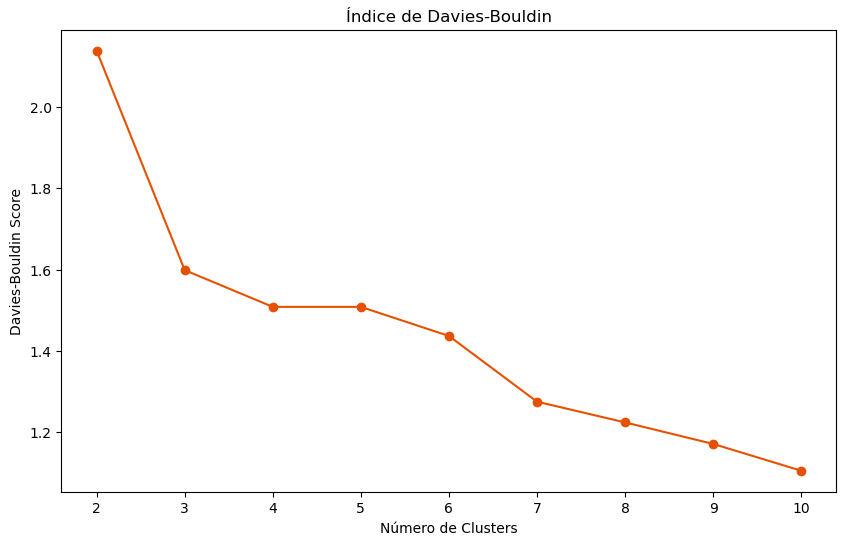

In [12]:
# Índice de Davies-Bouldin
def calculate_davies_bouldin(data, max_clusters=10):
    db_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(data)
        db_score = davies_bouldin_score(data, clusters)
        db_scores.append(db_score)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), db_scores, marker='o', c = "#e65100")
    plt.title('Índice de Davies-Bouldin')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Davies-Bouldin Score')
    plt.show()

calculate_davies_bouldin(TABLA2_ESC, max_clusters=10)
optimal_clusters = 3

KM_TABLA2 = KMeans(n_clusters=optimal_clusters, random_state=42)
TABLA2['cluster'] = KM_TABLA2.fit_predict(TABLA2_ESC)


Interprete los resultados de los centroides. Implemente una función que le permita analizar los resultados de los centroides de forma automática. No olvide considerar la transformaciones inversas del escalamiento o transformación z-score.

Centroides (original):

Clúster 0:
  PAC_EDAD: 11.15
  SATO2: 97.48
  TEMPERATURA: 36.91
  GLASGOW: 14.99
  EVA: 3.40
  HGT: 163.04
  FR: 19.20
  DIAS_HOSP: 1.21
Clúster 1:
  PAC_EDAD: 55.92
  SATO2: 96.63
  TEMPERATURA: 36.52
  GLASGOW: 14.92
  EVA: 4.42
  HGT: 181.81
  FR: 17.47
  DIAS_HOSP: 1.17
Clúster 2:
  PAC_EDAD: 24.50
  SATO2: 97.62
  TEMPERATURA: 36.59
  GLASGOW: 14.98
  EVA: 4.36
  HGT: 164.81
  FR: 17.43
  DIAS_HOSP: 58.56


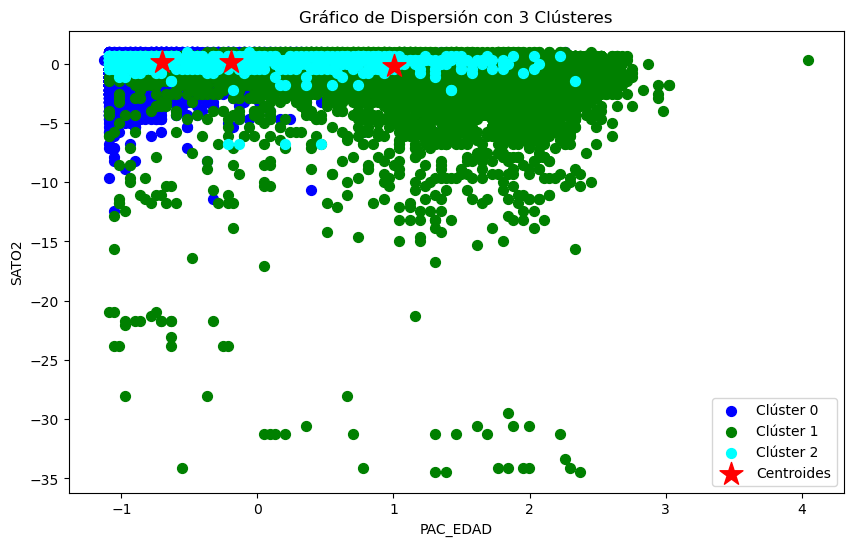

In [13]:
def ANALISIS_CENTROIDS(data, kmeans, scaler):
    centroides = kmeans.cluster_centers_
    centroides_original = scaler.inverse_transform(centroides)

    print("Centroides (original):\n")
    for i, centroide in enumerate(centroides_original):
        print(f"Clúster {i}:")
        for j, valor in enumerate(centroide):
            print(f"  {data.columns[j]}: {valor:.2f}")
    
    plt.figure(figsize=(10, 6))
    colores = ['blue', 'green', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'pink']
    for i in range(optimal_clusters):
        plt.scatter(TABLA2_ESC[data['cluster'] == i, 0], TABLA2_ESC[data['cluster'] == i, 1], 
                    s=50, c=colores[i], label=f'Clúster {i}')
    plt.scatter(centroides[:, 0], centroides[:, 1], s=300, c='red', marker='*', label='Centroides')
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.title(f'Gráfico de Dispersión con {optimal_clusters} Clústeres')
    plt.legend()
    plt.show()

ANALISIS_CENTROIDS(TABLA2, KM_TABLA2, ESCALAR)

<i> A diferencia del primer ejercicio en donde se mostraba una escenario ideal para analizar gráficamente el ajuste de las variables respecto a los clusters, en este caso, se genera tres clusters variables muy dispersas. El primer cluster corresponde a pacientes que tienen edades cercanas a los 11 años, el segundo cluster corresponde a pacientes con edad de alrededor de 56 años y el tercer cluster pertenecen a pacientes con edades cercanas a los 25 años. Los dos primeros clusters tiene una corta estadía en el hospital, mientras que el tercer cluster permanece en promedio 25 días en el hospital.